<a href="https://colab.research.google.com/github/Rachhh53/House-Prices-Advanced-Regression-Techniques-Kaggle/blob/main/house_prices_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ingest

The dependent variable of interest is house prices in Ames, Iowa (‘SalePrice’). 

In [ ]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [ ]:
# Import test and train datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# View first lines of training data
df_train.head(n=4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


In [ ]:
# View first lines of test data
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


SalesPrice is omitted since it is our dependent variable.

# EDA

In [ ]:
# view data types and mission values on the training data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<span style="color:blue">Observations:</span><br>
LotFrontage has <strong>259</strong> (1460-1201) missing values. <br>
Alley has <strong>1369</strong> (1460-91) missing values.<br>
MasVnrType has <strong>8</strong> (1460-1452) missing values.<br>
MasVnrArea has <strong>8</strong> (1460-1452) missing values.<br>
BsmtQual has <strong>37</strong> (1460-1423) missing values.<br>
BsmtCond has <strong>37</strong> (1460-1423) missing values.<br>
BsmtExposure has <strong>38</strong> (1460-1422) missing values.<br>
BsmtFinType1 has <strong>37</strong> (1460-1423) missing values.<br>
BsmtFinType2 has <strong>38</strong> (1460-1422) missing values.<br>
Electrical has <strong>1</strong> (1460-1459) missing value.<br>
FireplaceQu has <strong>690</strong> (1460-770) missing values.<br>
GarageType has <strong>81</strong> (1460-1379) missing values.<br>
GarageYrBlt has <strong>81</strong> (1460-1379) missing values.<br>
GarageFinish has <strong>81</strong> (1460-1379) missing values.<br>
GarageQual has <strong>81</strong> (1460-1379) missing values.<br>
GarageCond has <strong>81</strong> (1460-1379) missing values.<br>
PoolQC has <strong>1453</strong> (1460-7) missing values.<br>
Fence has <strong>1179</strong> (1460-281) missing values.<br>
MiscFeature has <strong>1406</strong> (1460-54) missing values.<br>

In [ ]:
# credit: https://www.kaggle.com/gorkembakir/hp-eda
def plot_hist(variable):
    plt.figure(figsize=(7,3))
    plt.hist(df_train[variable],bins=30)
    plt.xlabel(variable)
    plt.title("{}".format(variable))
    plt.show()

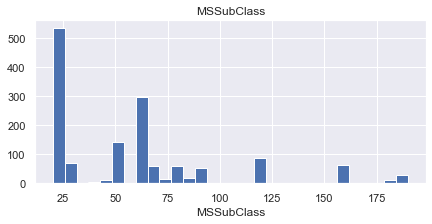

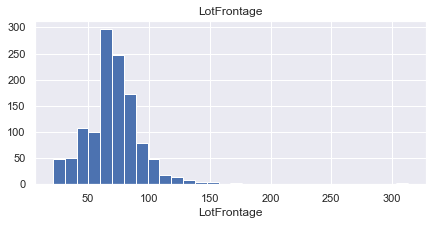

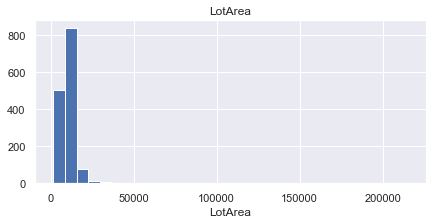

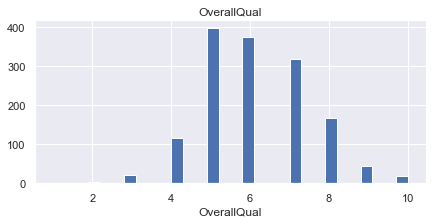

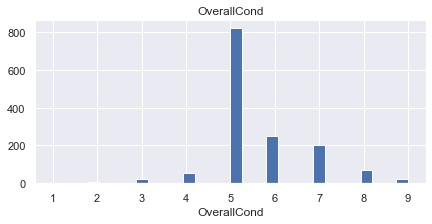

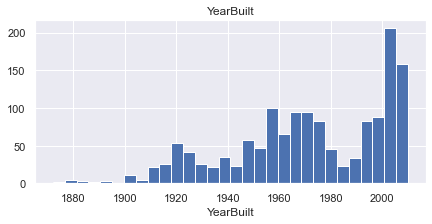

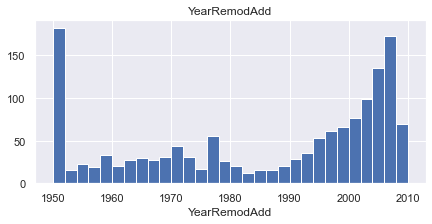

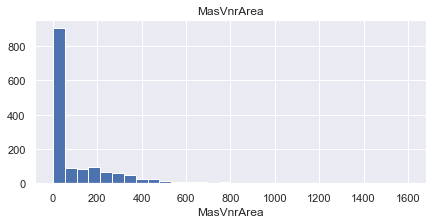

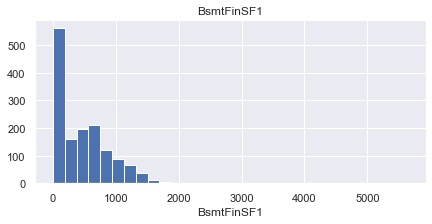

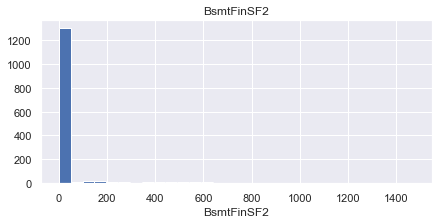

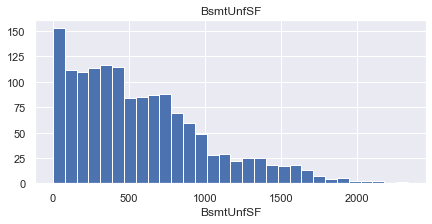

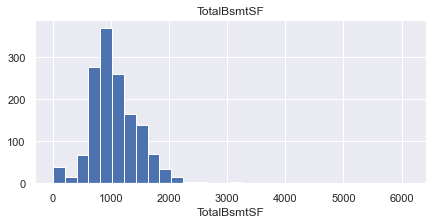

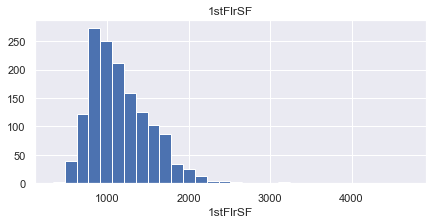

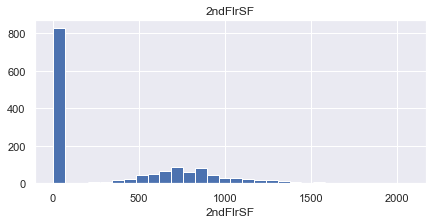

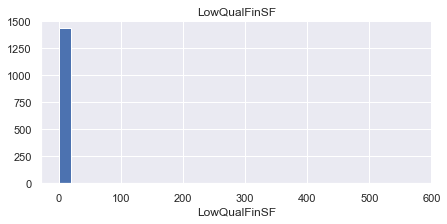

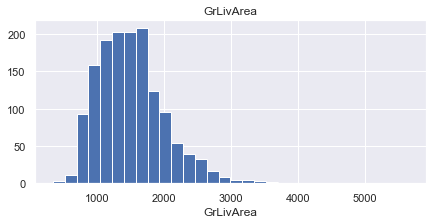

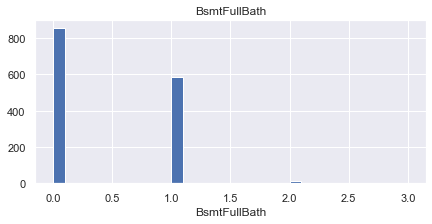

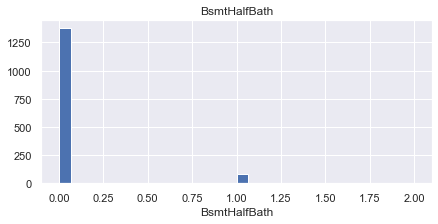

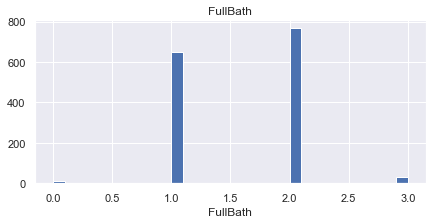

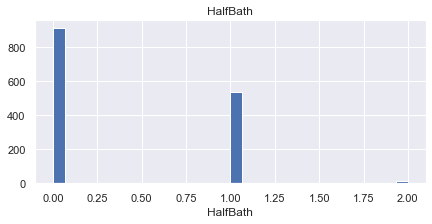

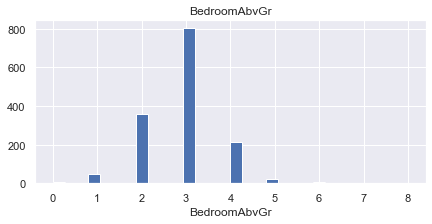

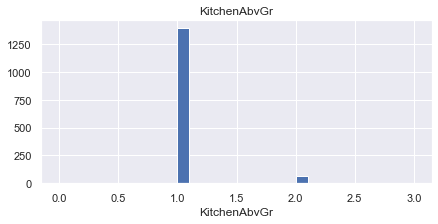

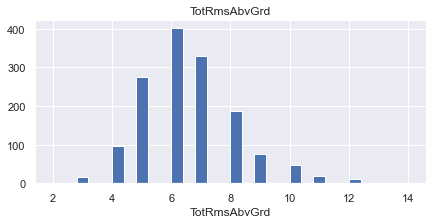

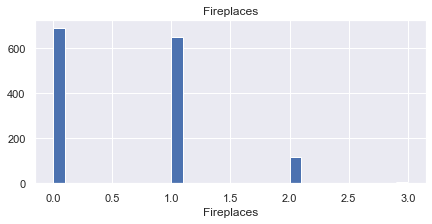

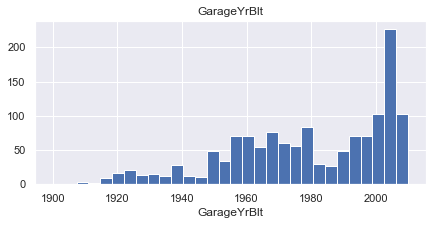

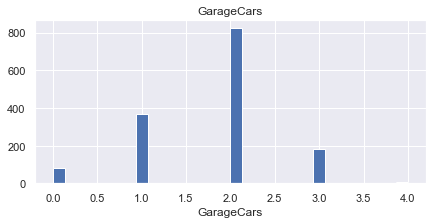

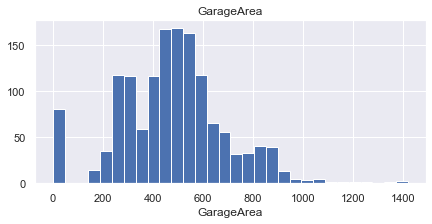

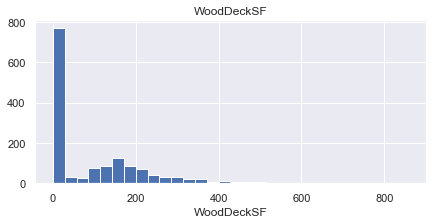

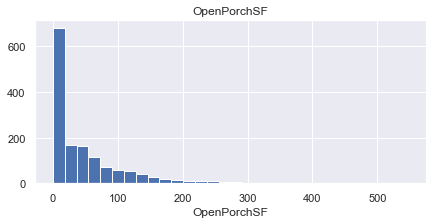

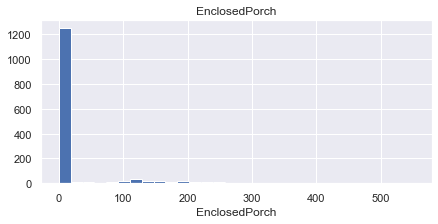

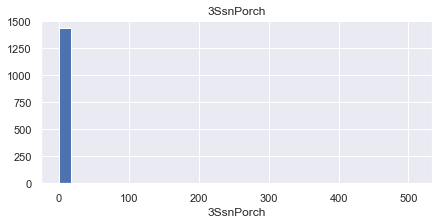

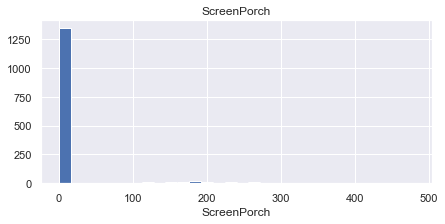

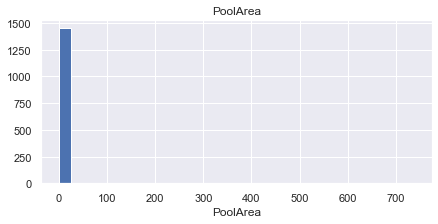

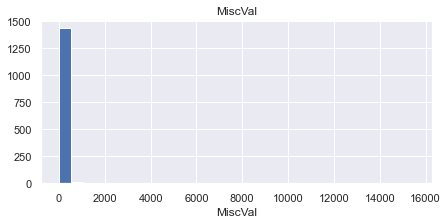

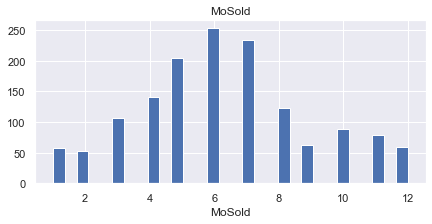

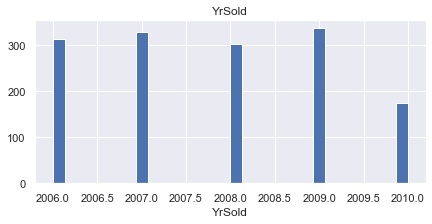

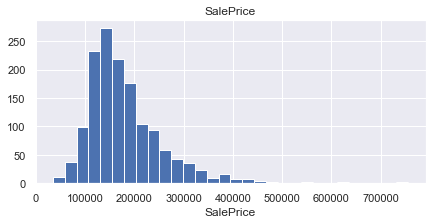

In [ ]:
# some feature distributions
numeric=[
'MSSubClass',
'LotFrontage',
'LotArea',
'OverallQual',
'OverallCond',
'YearBuilt',
'YearRemodAdd',
'MasVnrArea',
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'BsmtFullBath',
'BsmtHalfBath',
'FullBath',
'HalfBath',
'BedroomAbvGr',
'KitchenAbvGr',
'TotRmsAbvGrd',
'Fireplaces',
'GarageYrBlt',
'GarageCars',
'GarageArea',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MiscVal',
'MoSold',
'YrSold',
'SalePrice',
]
for n in numeric:
    plot_hist(n)

<h3>1. Provide appropriate descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable.</h3>

In [ ]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<h4>A linear regression fit and univariate KDE curves.</h4>

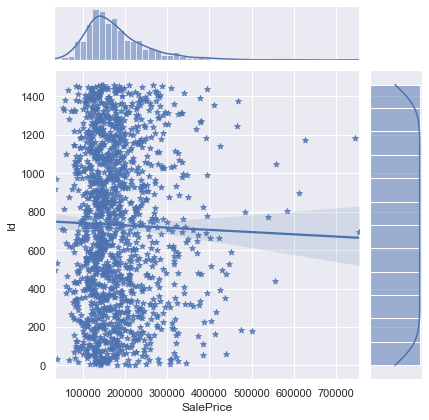

In [ ]:
# here "*" is used as a marker for scatterplot
sns.jointplot(data=df_train, x="SalePrice", y="Id", kind="reg", marker="*")

I used Id as the y-axis to ensure I saw all data about SalePrice without noise.<br>
<span style="color:blue">Observations:</span><br>
It looks like there are a few outliers at the highest sale price, leading to a long right tail, but the distibution is mostly normal for SalePrice.

<h3>2. Investigate missing data and outliers.</h3>

<h4>Missing Data</h4>

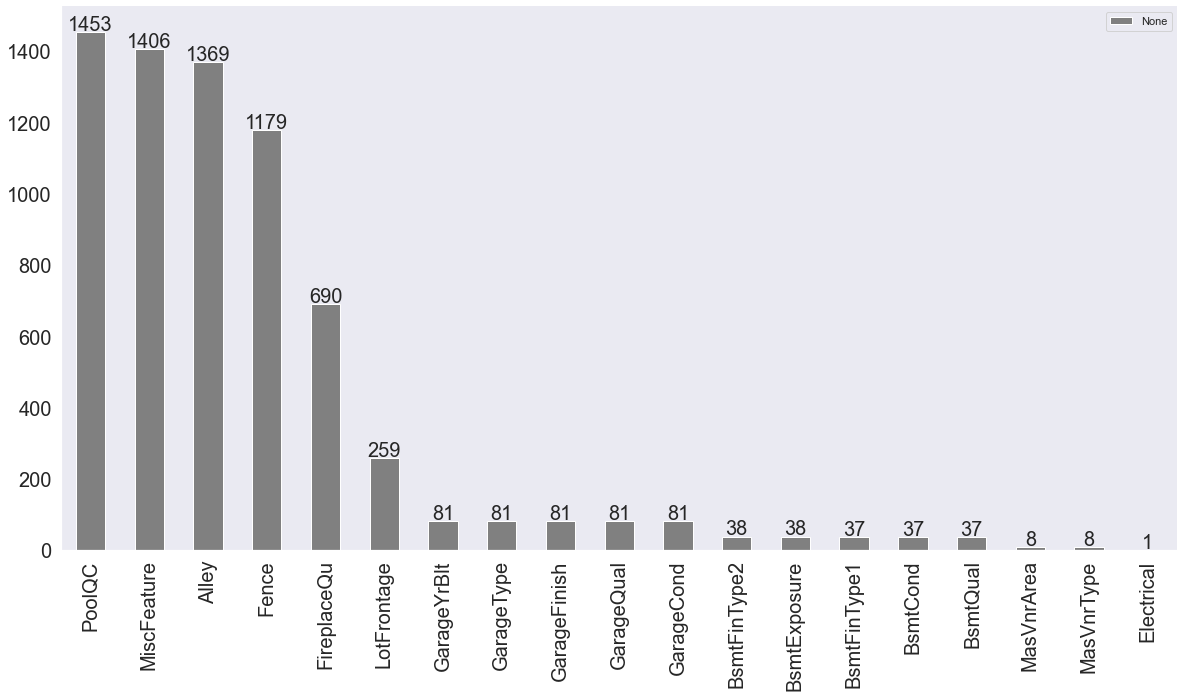

In [ ]:
# credit: https://www.kaggle.com/ohseokkim/house-price-all-about-house-price
# .loc[:, ] sets a value for an entire column
isnull_series = df_train.loc[:,:'SaleCondition'].isnull().sum()
isnull_series[isnull_series > 0].sort_values(ascending=False)

plt.figure(figsize = (20,10))
ax = isnull_series[isnull_series > 0].sort_values(ascending=False).plot(kind='bar',
                                                                        grid = False,
                                                                        fontsize=20,
                                                                        color='grey')
plt.legend(loc = 'upper right')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 5, height, ha = 'center', size = 20)
sns.despine()

All the above features have missing data.

<h4>Outliers</h4>

In [ ]:
def get_boxplots(feat):
    plt.figure()
    return sns.boxplot(x=df_train[feat])

<ipython-input-46-6ec9429efd29>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


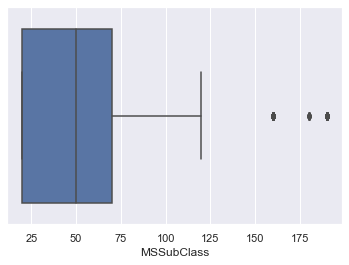

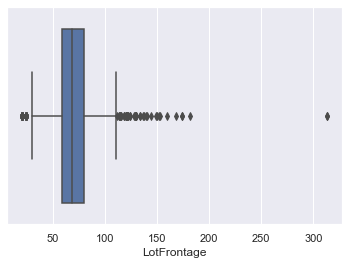

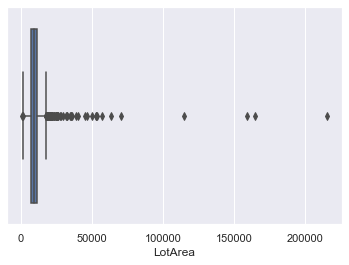

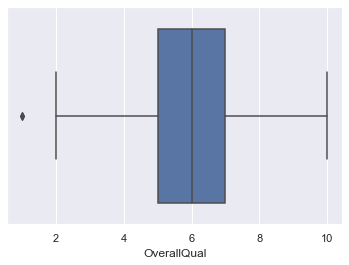

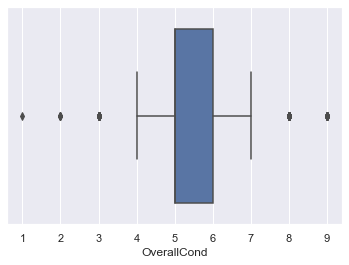

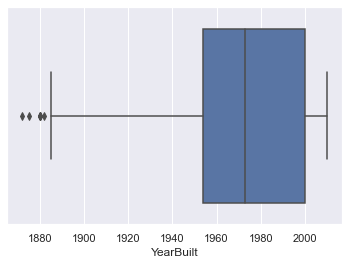

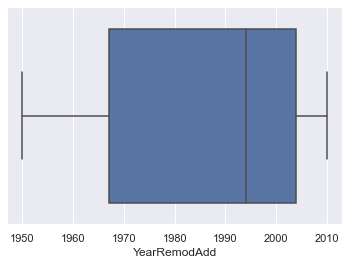

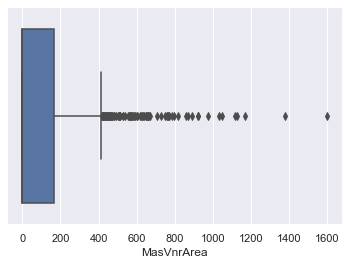

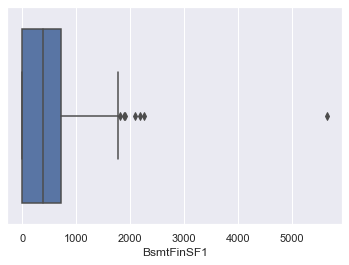

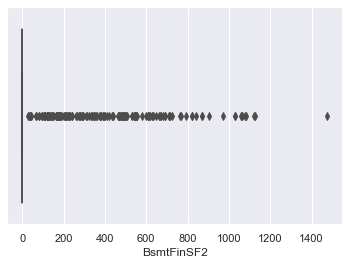

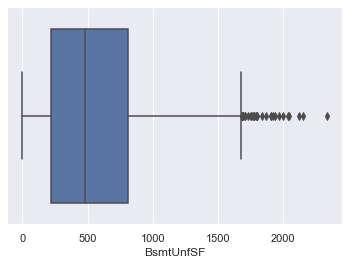

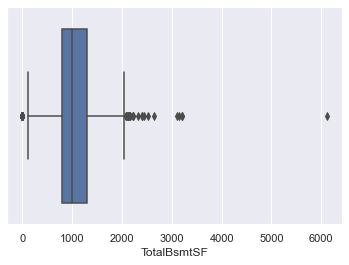

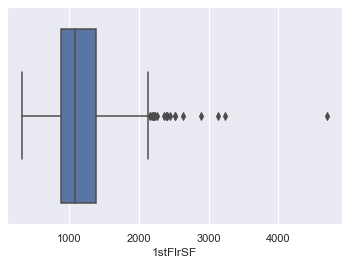

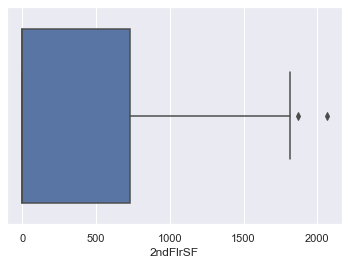

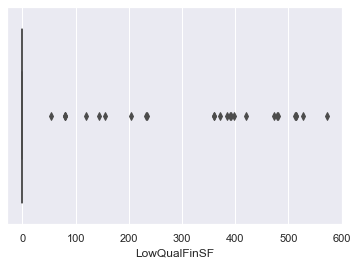

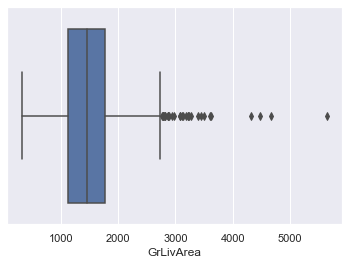

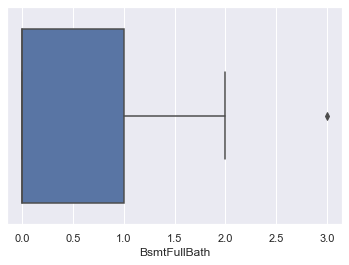

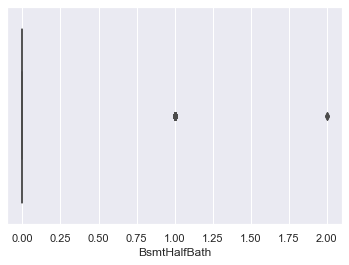

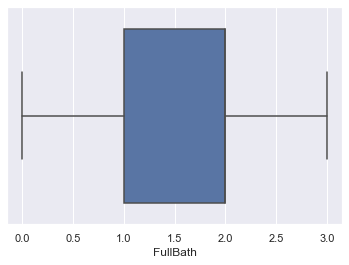

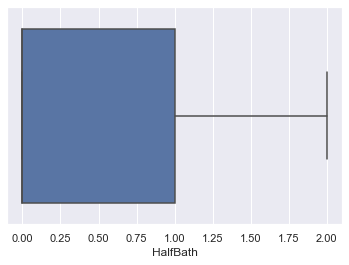

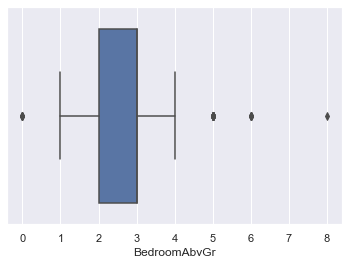

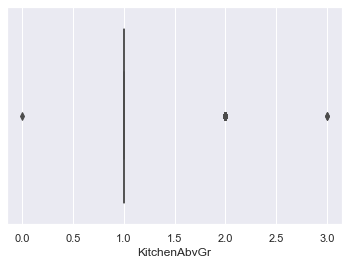

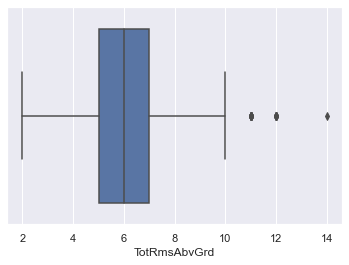

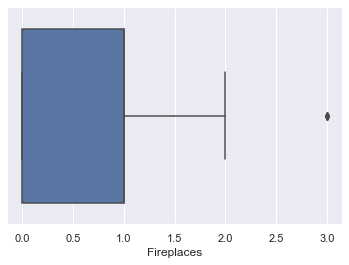

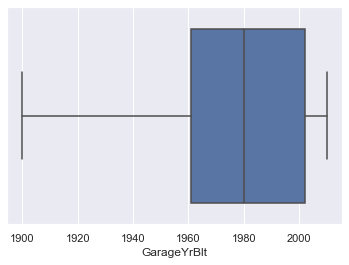

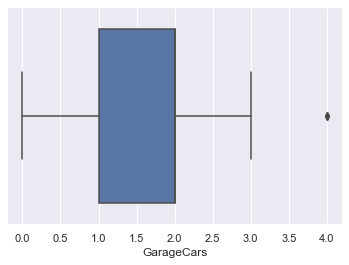

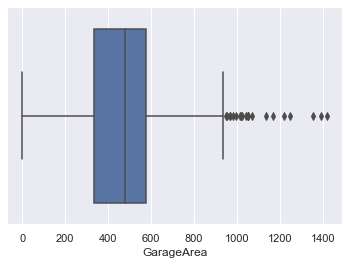

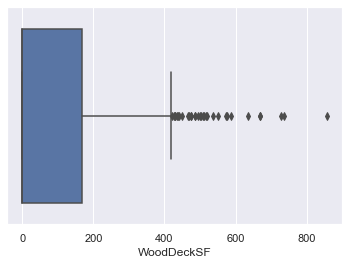

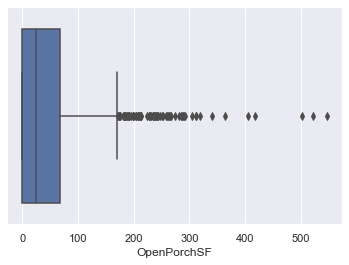

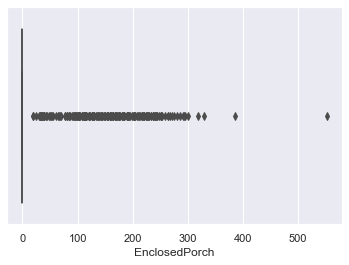

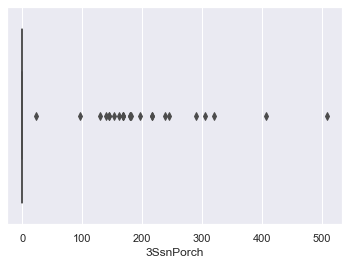

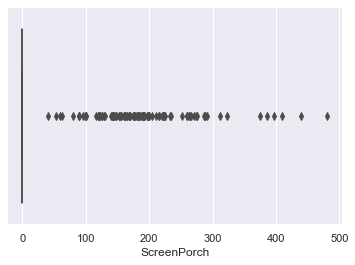

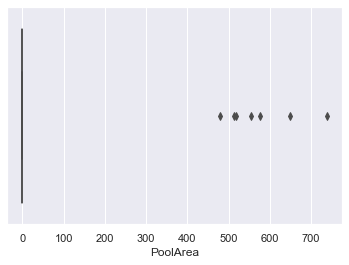

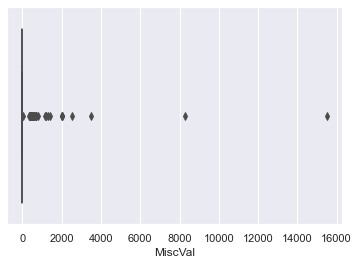

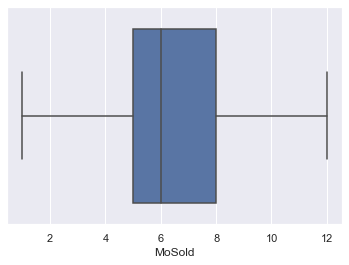

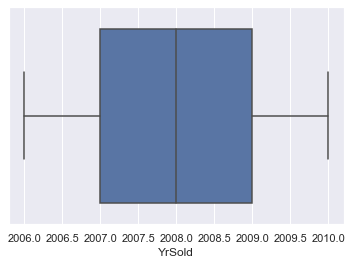

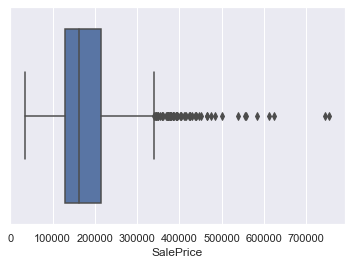

In [ ]:
# boxplots to identify outliers
for f in numeric:
    get_boxplots(f)

<span style="color:blue">Observations:</span><br>
Almost all of our features have an outlier or two. Some of our features do not follow a normal distribution and appear as entirely outliers.<br>
For example: An obvious feature to see an outlier is in KitchenAvbGr. Most would expect that homes have a kitchen on the ground floor. A home with 0, 2 or 3 kitchens on the ground floor has been flagged as an outlier.

<h3>3. Investigate at least three potential predictors of the dependent variable and provide appropriate graphs / statistics to demonstrate the relationships.</h3>

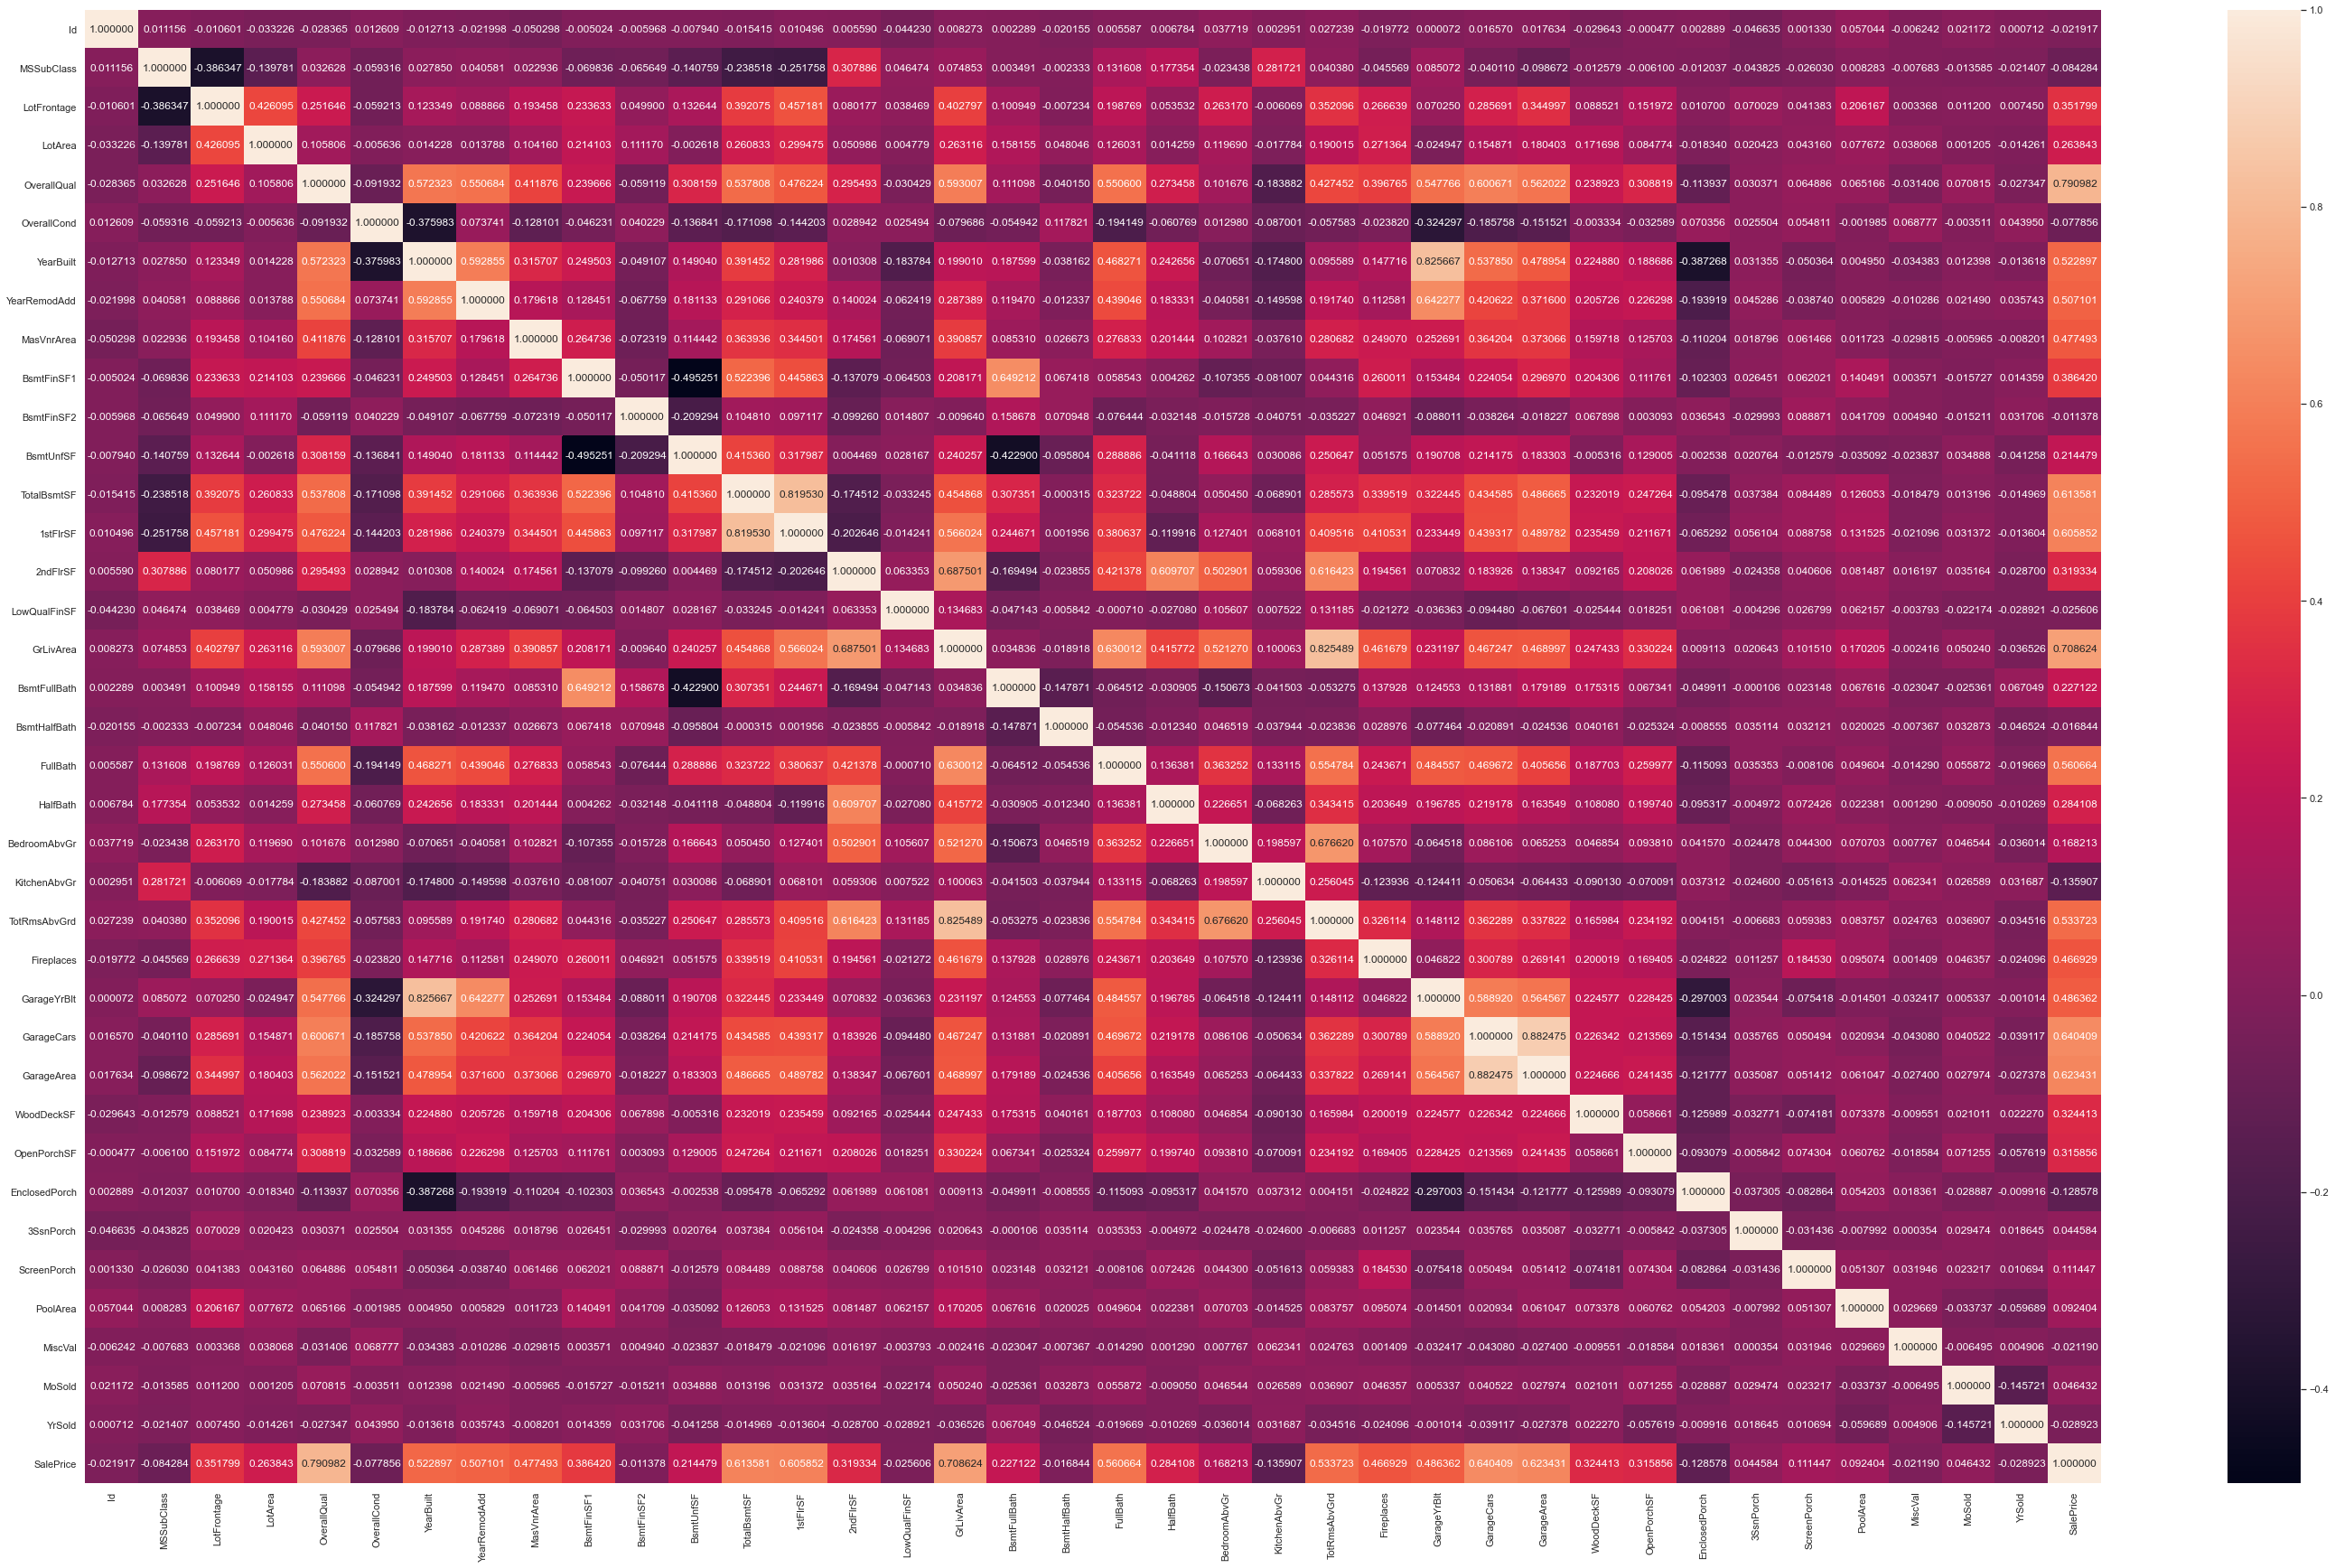

In [ ]:
# credit: https://www.kaggle.com/gorkembakir/hp-eda
f, ax =plt.subplots(figsize=(50,30))
sns.heatmap(df_train.corr(),annot=True, fmt="1f", ax=ax)
plt.show()

<span style="color:blue">Observations:</span><br>
<strong>Features with > 50% positive correlation to our dependent variable SalesPrice:</strong><br>
OverallQual<br>
YearBuilt<br>
YearRemodAdd<br>
TotalBsmtSF<br>
1stFlSF<br>
GrLivArea<br>
FullBath<br>
TotRmsAbvGrd<br>
GarageCars<br>
GarageArea<br>

In [ ]:
df_train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<h4>Potential Predictor of the dependent variable (SalePrice) #1: OverallQual</h4>

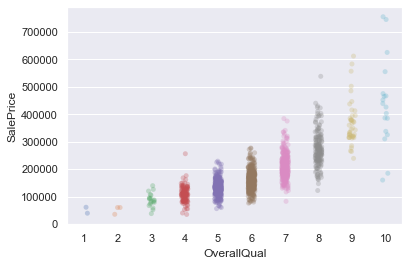

In [ ]:
sns.stripplot(x='OverallQual', y='SalePrice', data=df_train, alpha=0.3, jitter=True);

<span style="color:blue">Observations:</span><br>
This appears to confirm that as overall quality increase, so does sale price.

In [ ]:
oq=df_train[["OverallQual","SalePrice"]].groupby(["OverallQual"], as_index=False).count().sort_values(by="SalePrice",ascending="True")
oq

,OverallQual,SalePrice
0,1,2
1,2,3
9,10,18
2,3,20
8,9,43
3,4,116
7,8,168
6,7,319
5,6,374
4,5,397


This shows us counts associated with each overall quality score.

In [ ]:
oq2=df_train[["OverallQual","SalePrice"]].groupby(["OverallQual"], as_index=False).mean().sort_values(by="SalePrice",ascending="True")
oq2

,OverallQual,SalePrice
0,1,50150.000000
1,2,51770.333333
2,3,87473.750000
3,4,108420.655172
4,5,133523.347607
5,6,161603.034759
6,7,207716.423197
7,8,274735.535714
8,9,367513.023256
9,10,438588.388889


<span style="color:blue">Observations:</span><br>
This supports the idea that as sales price increases, so does quality score.

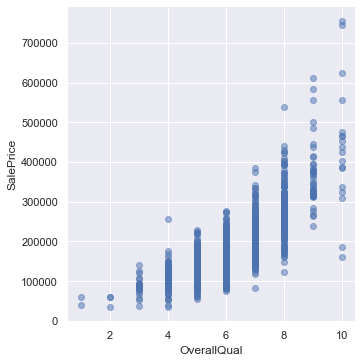

In [ ]:
sns.lmplot(x='OverallQual', y='SalePrice', data=df_train, fit_reg=False, scatter_kws={'alpha':0.5});

<h4>Potential Predictor of the dependent variable (SalePrice) #2: YearRemodAdd</h4>

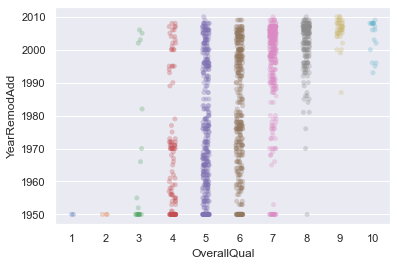

In [ ]:
sns.stripplot(x='OverallQual', y='YearRemodAdd', data=df_train, alpha=0.3, jitter=True);

In [ ]:
yra2=df_train[["YearRemodAdd","SalePrice"]].groupby(["YearRemodAdd"], as_index=False).mean().sort_values(by="SalePrice",ascending="True")
yra2

,YearRemodAdd,SalePrice
2,1952,110398.600000
0,1950,117463.056180
21,1971,120230.555556
4,1954,121142.857143
32,1982,121271.428571
...,...,...
57,2007,224807.250000
56,2006,229471.134021
58,2008,269709.100000
59,2009,284085.391304


<span style="color:blue">Observations:</span><br>
This supports the idea that the more recently remodeled homes are selling for higher prices.

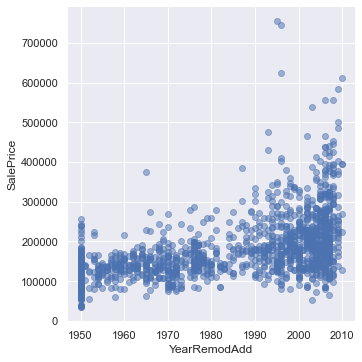

In [ ]:
sns.lmplot(x='YearRemodAdd', y='SalePrice', data=df_train, fit_reg=False, scatter_kws={'alpha':0.5});

<span style="color:blue">Observations:</span><br>
It's not super strong, but it does look like there is increased density around the later years and only later years have very high sale prices.

<h4>Potential Predictor of the dependent variable (SalePrice) #2: GarageArea</h4>

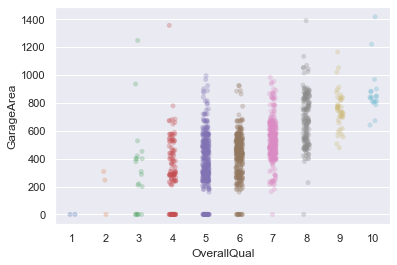

In [ ]:
sns.stripplot(x='OverallQual', y='GarageArea', data=df_train, alpha=0.3, jitter=True);

<span style="color:blue">Observations:</span><br>
This one is not as highly correlated. This says that garage area is not the only determining factor of a higher sales price.

In [ ]:
ga=df_train[["GarageArea","SalePrice"]].groupby(["GarageArea"], as_index=False).mean().sort_values(by="SalePrice",ascending="True")
ga

,GarageArea,SalePrice
75,350,60000.0
42,287,72500.0
5,189,78000.0
8,200,79125.0
437,1248,81000.0
...,...,...
325,716,556581.0
428,1020,582933.0
364,807,625000.0
368,813,745000.0


<span style="color:blue">Observations:</span><br>
Again, some home with smaller garages are selling for a higher price, supporting the idea that garage size alone is not a predictor of sale price.

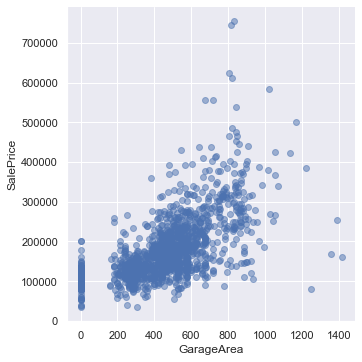

In [ ]:
sns.lmplot(x='GarageArea', y='SalePrice', data=df_train, fit_reg=False, scatter_kws={'alpha':0.5});

<span style="color:blue">Observations:</span><br>
There must be another factor that would cause this feature to correlate better with sale price. 

<h3>4. Engage in feature creation by splitting, merging, or otherwise generating a new predictor.</h3>

Create a feature that indicates if the home has a garage or not.

In [ ]:
for index, row in enumerate(df_train["GarageType"]):
    #print(row)
    if pd.isna(row):
        df_train.loc[index, "HasGarage"] = "Yes"
    else:
        df_train.loc[index, "HasGarage"] = "No"

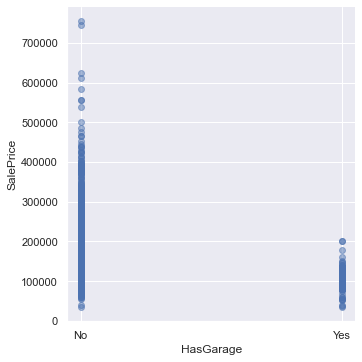

In [ ]:
sns.lmplot(x='HasGarage', y='SalePrice', data=df_train, fit_reg=False, scatter_kws={'alpha':0.5});

Did a little check-see to ensure we have some of each value coming through.

<h3>5. Using the dependent variable, perform both min-max and standard scaling in Python.</h3>

<h4>min-max</h4>

                0            1            2            3            4   \
count  1460.000000  1460.000000  1201.000000  1460.000000  1460.000000   
mean      0.500000     0.217043     0.167979     0.043080     0.566591   
std       0.288972     0.248827     0.083167     0.046653     0.153666   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.250000     0.000000     0.130137     0.029229     0.444444   
50%       0.500000     0.176471     0.164384     0.038227     0.555556   
75%       0.750000     0.294118     0.202055     0.048150     0.666667   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                5            6            7            8            9   ...  \
count  1460.000000  1460.000000  1460.000000  1452.000000  1460.000000  ...   
mean      0.571918     0.719332     0.581096     0.064803     0.078604  ...   
std       0.139100     0.218862     0.344090     0.113166     0.080811  ...   
min       0.00000

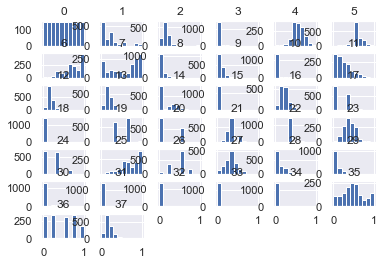

In [ ]:
# https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
# retrieve just the numeric input values
data = df_train.select_dtypes(include=[np.number])
#print(data)
# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
data_trans = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = pd.DataFrame(data_trans)
# summarize
print(dataset.describe())
# histograms of the variables
dataset.hist()
plt.show()

Distributions have been adjusted to between 0 and 1 min-max.

<h4>standard scaling</h4>

                 0             1             2             3             4   \
count  1.460000e+03  1.460000e+03  1.201000e+03  1.460000e+03  1.460000e+03   
mean   8.243026e-17 -1.504124e-16 -2.846969e-16 -4.202783e-17 -7.680310e-17   
std    1.000343e+00  1.000343e+00  1.000417e+00  1.000343e+00  1.000343e+00   
min   -1.730865e+00 -8.725628e-01 -2.020626e+00 -9.237292e-01 -3.688413e+00   
25%   -8.654324e-01 -8.725628e-01 -4.552059e-01 -2.969908e-01 -7.951515e-01   
50%    0.000000e+00 -1.631095e-01 -4.325330e-02 -1.040633e-01 -7.183611e-02   
75%    8.654324e-01  3.098594e-01  4.098945e-01  1.087080e-01  6.514792e-01   
max    1.730865e+00  3.147673e+00  1.000839e+01  2.051827e+01  2.821425e+00   

                 5             6             7             8             9   \
count  1.460000e+03  1.460000e+03  1.460000e+03  1.452000e+03  1.460000e+03   
mean   3.692632e-16  1.032983e-15  4.518912e-15  2.561465e-16  1.505645e-17   
std    1.000343e+00  1.000343e+00  1.000343e+00  1.

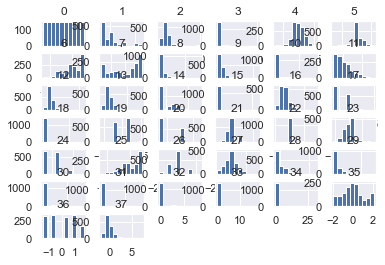

In [ ]:
# https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
data = df_train.select_dtypes(include=[np.number])
#print(data)
# perform a robust scaler transform of the dataset
trans = StandardScaler()
data_trans = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = pd.DataFrame(data_trans)
# summarize
print(dataset.describe())
# histograms of the variables
dataset.hist()
plt.show()

Distributions have been adjusted and that the mean is a very small number close to zero and the standard deviation is very close to 1.0 for each variable.

# Modeling

# Conclusion